In [49]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [76]:
df = pd.read_csv('info.txt', sep=' ')
df

,id,name,gender,age,task
0,1,Ana,femal,23,2
1,2,Alex,male,25,3
2,3,Helen,female,25,7
3,4,Welen,male,32,3
4,5,Echo,female,21,6
5,6,Bob,male,35,9
6,7,Mike,male,32,10


In [85]:
df = pd.DataFrame({'A':[1,2,3], 'b':[3,4,5]}, index='CA CD CF'.split())
df

,A,b
CA,1,3
CD,2,4
CF,3,5


In [52]:
# 1. read the CSV file
Covid = pd.read_csv('time-series-19-covid-combined.csv')
Covid

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
85902,2020-11-29,Zimbabwe,NaN,9822,8472.0,275
85903,2020-11-30,Zimbabwe,NaN,9950,8482.0,276
85904,2020-12-01,Zimbabwe,NaN,10129,8643.0,277
85905,2020-12-02,Zimbabwe,NaN,10129,8643.0,277


In [53]:
# 2. Create a DataFrame from the CSV file
df = pd.DataFrame(data=Covid)

In [54]:
df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
85902,2020-11-29,Zimbabwe,NaN,9822,8472.0,275
85903,2020-11-30,Zimbabwe,NaN,9950,8482.0,276
85904,2020-12-01,Zimbabwe,NaN,10129,8643.0,277
85905,2020-12-02,Zimbabwe,NaN,10129,8643.0,277


In [55]:
# 3. Merge the data for countries with multiple regions in order to provide a single time-series for each country.
merge = df.groupby(['Country/Region', 'Date'], as_index=False).sum()

In [56]:
merge

,Country/Region,Date,Confirmed,Recovered,Deaths
0,Afghanistan,2020-01-22,0,0.0,0
1,Afghanistan,2020-01-23,0,0.0,0
2,Afghanistan,2020-01-24,0,0.0,0
3,Afghanistan,2020-01-25,0,0.0,0
4,Afghanistan,2020-01-26,0,0.0,0
...,...,...,...,...,...
60542,Zimbabwe,2020-11-29,9822,8472.0,275
60543,Zimbabwe,2020-11-30,9950,8482.0,276
60544,Zimbabwe,2020-12-01,10129,8643.0,277
60545,Zimbabwe,2020-12-02,10129,8643.0,277


In [57]:
# 4. (a.) Print the total number of confirmed cases and number of deaths in each country in the last reported day
last_report_day = merge['Date'].max()
cases_and_deaths_in_last_report_day = merge[merge['Date'] == last_report_day]
cases_and_deaths_in_last_report_day

,Country/Region,Date,Confirmed,Recovered,Deaths
316,Afghanistan,2020-12-03,46718,37218.0,1841
633,Albania,2020-12-03,40501,20484.0,852
950,Algeria,2020-12-03,85927,55538.0,2480
1267,Andorra,2020-12-03,6904,6066.0,77
1584,Angola,2020-12-03,15361,8244.0,352
...,...,...,...,...,...
59278,West Bank and Gaza,2020-12-03,92708,68250.0,780
59595,Western Sahara,2020-12-03,10,8.0,1
59912,Yemen,2020-12-03,2239,1525.0,624
60229,Zambia,2020-12-03,17730,17102.0,357


In [58]:
# 4. (b). the 10 countries with the highest number of confirmed COVID-19 cases
cases_and_deaths_in_last_report_day.sort_values('Confirmed', ascending=False)['Country/Region'].head(10)

56108                US
25359             India
7607             Brazil
45013            Russia
19970            France
57376    United Kingdom
51036             Spain
27261             Italy
2218          Argentina
12045          Colombia
Name: Country/Region, dtype: object

In [59]:
# 4. (c). the 10 countries with the highest number of deaths
cases_and_deaths_in_last_report_day.sort_values('Deaths', ascending=False)['Country/Region'].head(10)

56108                US
7607             Brazil
25359             India
36454            Mexico
57376    United Kingdom
27261             Italy
19970            France
25993              Iran
51036             Spain
45013            Russia
Name: Country/Region, dtype: object

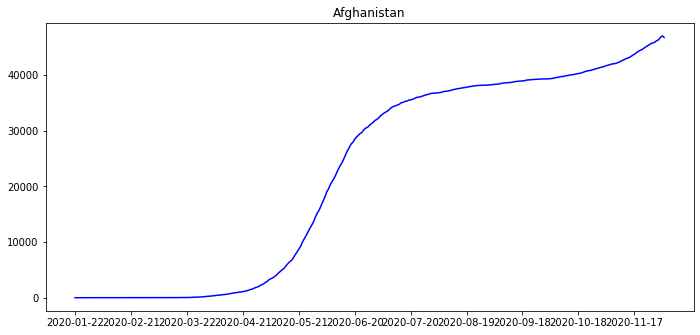

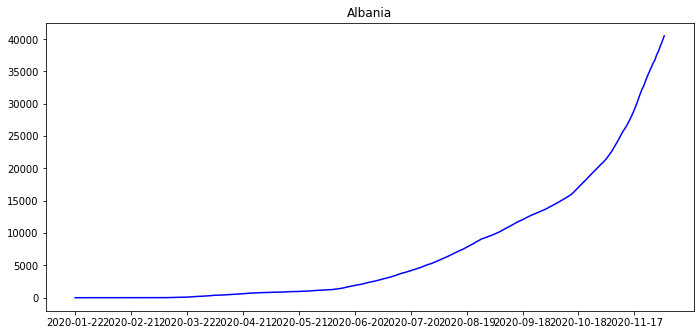

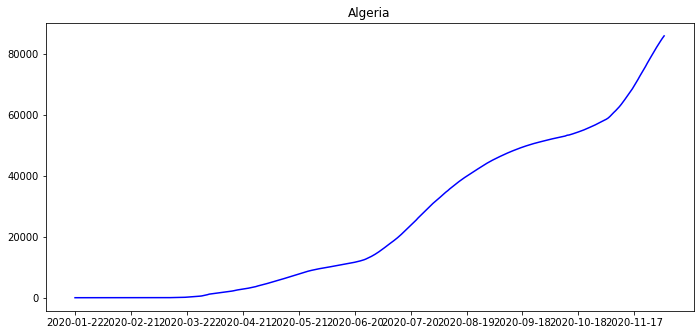

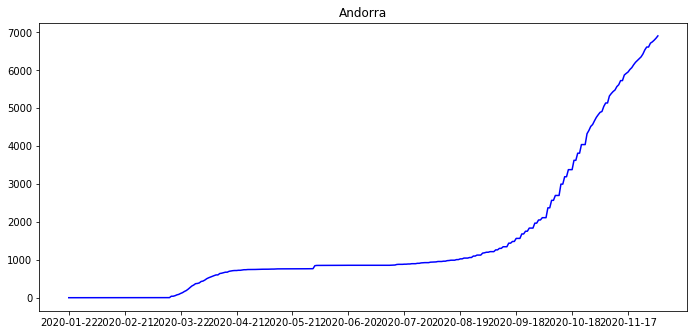

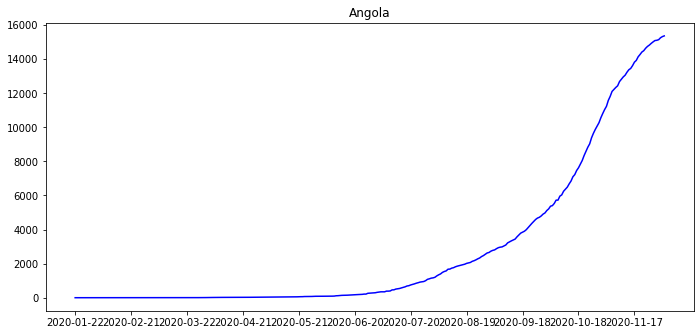

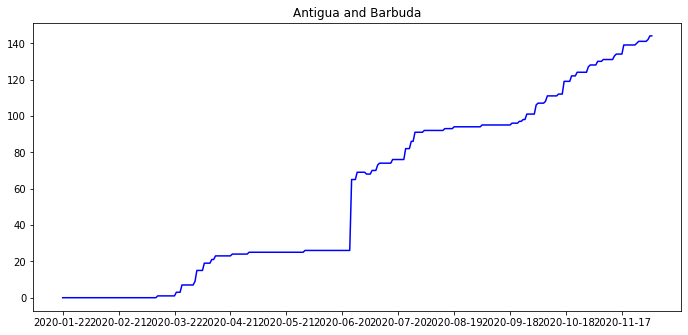

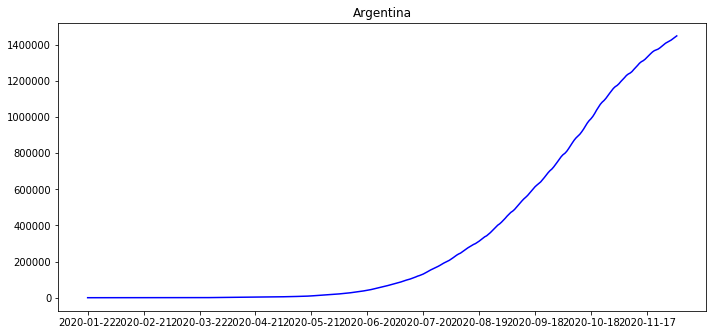

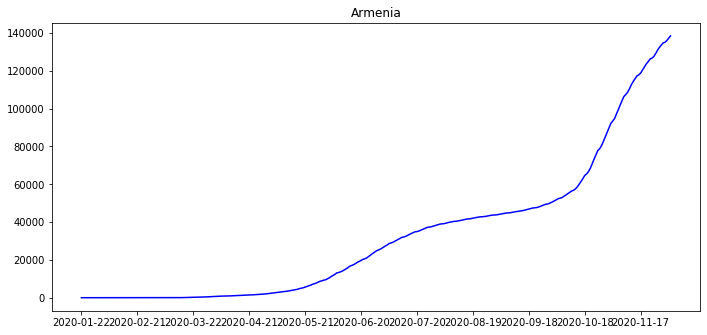

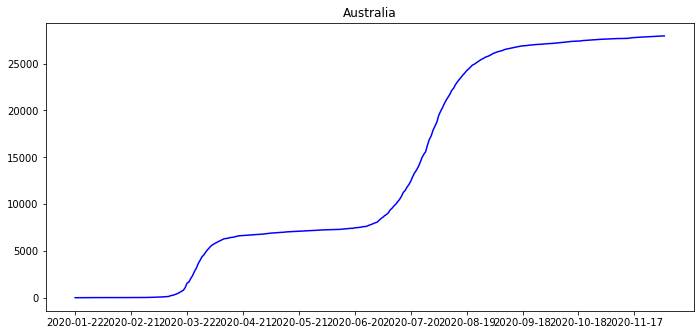

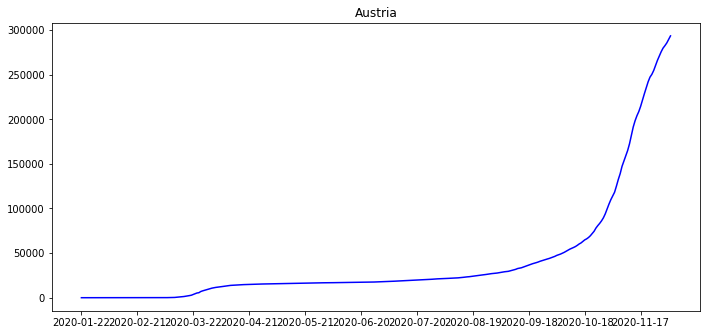

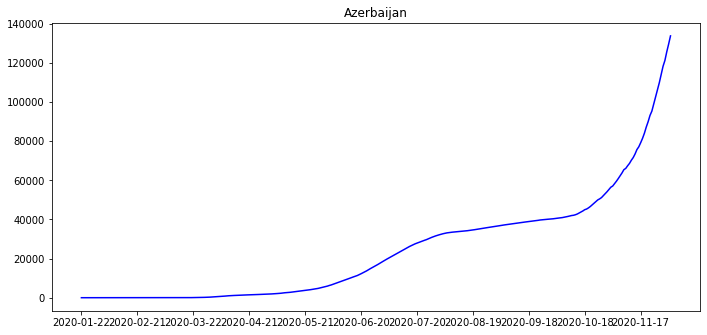

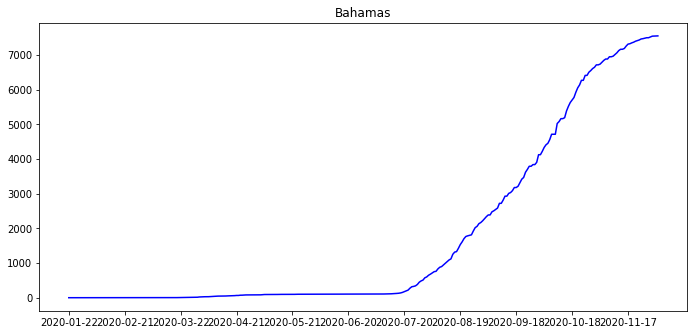

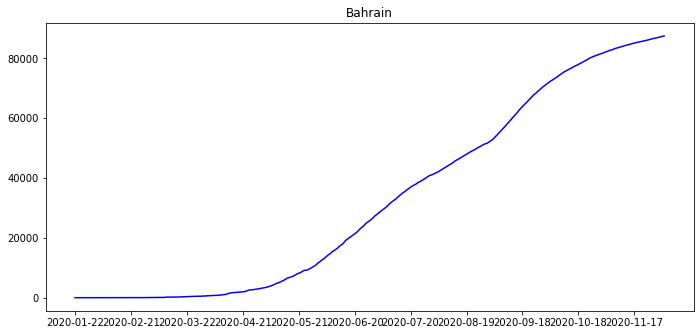

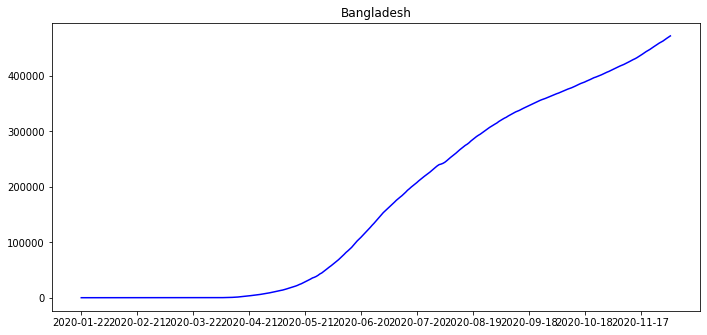

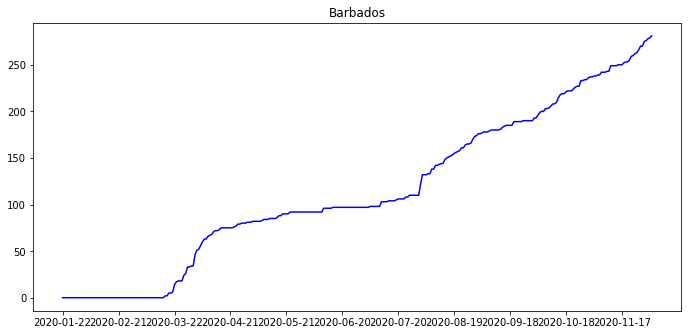

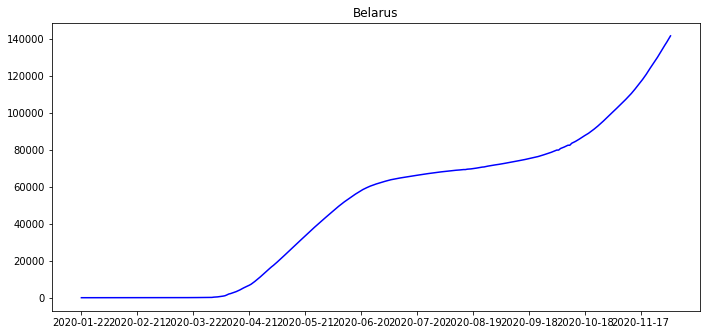

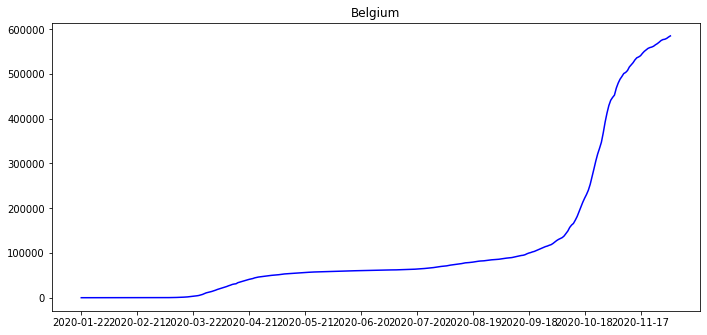

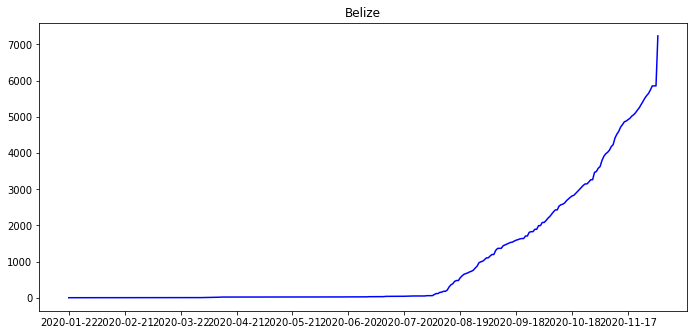

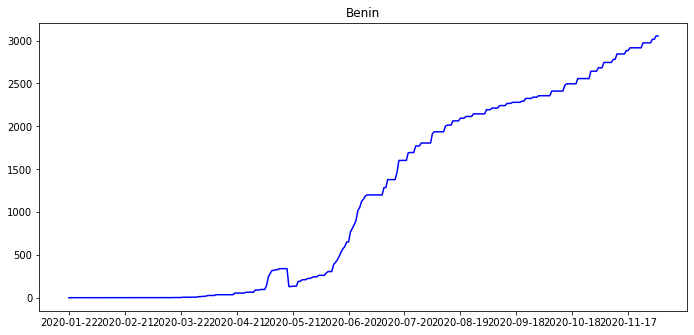

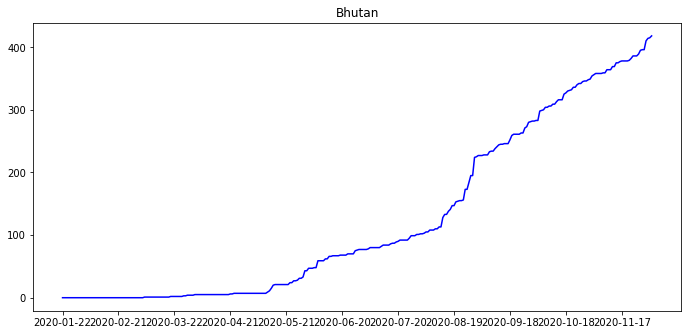

In [60]:
# 5. Plot a graph of the number of confirmed cases over time for the first 20 countries.
i = 0
countries = merge['Country/Region'].unique()
while i < 20:
    x = merge[merge['Country/Region'] == countries[i]]['Date']
    y = merge[merge['Country/Region'] == countries[i]]['Confirmed']
    fig, axes = plt.subplots(figsize=(9, 4))
    axes = fig.add_axes([0,0,1,1])
    axes.plot(x, y, color = 'blue')
    axes.set_xticks(x[::30])
    axes.set_title(countries[i])
    i += 1



In [61]:
print('From the 20 graphs we get in Jupyter Notebook, we can see that the following countries present exponential growth in the number of confirmed cases: Albania, Algeria, Andorra, Angola, Argentina, Armenia, Austria, Azerbaijan, Belgium, Belize. The following countries are already leaving exponential growth: Benin, Barbados, Bahamas, Australia, Afghanistan. ')

From the 20 graphs we get in Jupyter Notebook, we can see that the following countries present exponential growth in the number of confirmed cases: Albania, Algeria, Andorra, Angola, Argentina, Armenia, Austria, Azerbaijan, Belgium, Belize. The following countries are already leaving exponential growth: Benin, Barbados, Bahamas, Australia, Afghanistan. 


In [62]:
merge

,Country/Region,Date,Confirmed,Recovered,Deaths
0,Afghanistan,2020-01-22,0,0.0,0
1,Afghanistan,2020-01-23,0,0.0,0
2,Afghanistan,2020-01-24,0,0.0,0
3,Afghanistan,2020-01-25,0,0.0,0
4,Afghanistan,2020-01-26,0,0.0,0
...,...,...,...,...,...
60542,Zimbabwe,2020-11-29,9822,8472.0,275
60543,Zimbabwe,2020-11-30,9950,8482.0,276
60544,Zimbabwe,2020-12-01,10129,8643.0,277
60545,Zimbabwe,2020-12-02,10129,8643.0,277


In [63]:
most_affected_countries_of_20 = merge.groupby('Country/Region', as_index=False).sum().sort_values('Confirmed', ascending=False).head(20)

In [64]:
most_affected_countries_of_20['observed_case_fatality_ratio'] = most_affected_countries_of_20['Deaths'] / most_affected_countries_of_20['Confirmed']

In [65]:
most_affected_countries_of_20 = most_affected_countries_of_20.sort_values('observed_case_fatality_ratio', ascending=True)
most_affected_countries_of_20

,Country/Region,Confirmed,Recovered,Deaths,observed_case_fatality_ratio
148,Saudi Arabia,54734287,48224431.0,699114,0.012773
13,Bangladesh,54916400,37718181.0,767548,0.013977
79,India,804880683,684856536.0,13118805,0.016299
141,Russia,216985693,159003054.0,3584096,0.016518
131,Pakistan,54111650,45221728.0,1122058,0.020736
158,South Africa,97342873,81339406.0,2281648,0.023439
6,Argentina,105520038,83409361.0,2642184,0.025040
175,Turkey,61440397,50566030.0,1571709,0.025581
35,Chile,76171523,69158512.0,1955479,0.025672
66,Germany,76515171,58741230.0,2226419,0.029098


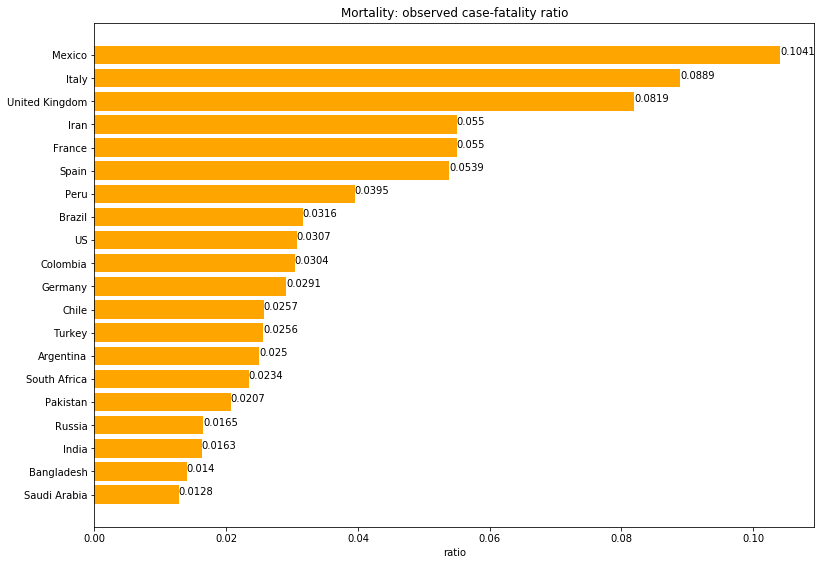

In [66]:
# 6. Create a bar plot that shows the number of deaths per 100 confirmed cases (observed case-fatality ratio) for the 20 most affected countries.
x = most_affected_countries_of_20['observed_case_fatality_ratio']
y = most_affected_countries_of_20['Country/Region']
fig = plt.figure(figsize=(10, 7))
axes = fig.add_axes([0,0,1,1])
axes.barh(y, round(x, 4), color='orange')
axes.set_title('Mortality: observed case-fatality ratio')
axes.set_xlabel('ratio')
for index, value in enumerate(round(x, 4)):
    axes.text(value, index, str(value))


In [67]:
population = pd.read_json('worldpopulation.json')
population

,Rank,country,population,World
0,1,China,1388232693,0.185
1,2,India,1342512706,0.179
2,3,U.S.,326474013,0.043
3,4,Indonesia,263510146,0.035
4,5,Brazil,211243220,0.028
...,...,...,...,...
190,191,San Marino,32104,0.000
191,192,Palau,21726,0.000
192,193,Nauru,10301,0.000
193,194,Tuvalu,9975,0.000


In [69]:
left = merge.groupby('Country/Region', as_index=False).sum()
right = population
cases_and_population = pd.merge(left, right, left_on='Country/Region', right_on='country')
cases_and_population

,Country/Region,Confirmed,Recovered,Deaths,Rank,country,population,World
0,Afghanistan,7103748,4901636.0,240426,40,Afghanistan,34169169,0.005
1,Albania,2306269,1240425.0,59031,136,Albania,2911428,0.000
2,Algeria,7954368,5405145.0,303965,35,Algeria,41063753,0.005
3,Andorra,473243,361559.0,13243,186,Andorra,68728,0.000
4,Angola,881323,386737.0,26185,50,Angola,26655513,0.004
...,...,...,...,...,...,...,...,...
168,Vanuatu,24,1.0,0,174,Vanuatu,276331,0.000
169,Venezuela,9248322,7929036.0,79229,43,Venezuela,31925705,0.004
170,Yemen,325083,183532.0,92137,49,Yemen,28119546,0.004
171,Zambia,1907504,1733272.0,42600,65,Zambia,17237931,0.002


In [487]:
# 7. Compute the ratio between the total number of confirmed cases and the population size for each country.
cases_and_population['affected_ratio'] = cases_and_population['Confirmed'] / cases_and_population['population']
cases_and_population[['Country/Region', 'affected_ratio']]

,Country/Region,affected_ratio
0,Afghanistan,0.207899
1,Albania,0.792144
2,Algeria,0.193708
3,Andorra,6.885738
4,Angola,0.033063
...,...,...
168,Vanuatu,0.000087
169,Venezuela,0.289683
170,Yemen,0.011561
171,Zambia,0.110657


In [488]:
# 7. What are the 10 countries with the highest number of confirmed COVID-19 cases per capita?
cases_and_population[['Country/Region', 'affected_ratio']].sort_values('affected_ratio', ascending=False).head(10)

,Country/Region,affected_ratio
128,Qatar,9.644720
12,Bahrain,7.337380
3,Andorra,6.885738
134,San Marino,5.875062
68,Holy See,4.585518
121,Panama,4.195546
34,Chile,4.159311
84,Kuwait,4.076877
94,Luxembourg,3.832225
98,Maldives,3.731530


In [489]:
file = open('climate.json', 'r')
climate = json.load(file)
file.close()

In [490]:
climate
    

[{'id': 1,
  'city': 'Amsterdam',
  'country': 'Netherlands',
  'monthlyAvg': [{'high': 7,
    'low': 3,
    'dryDays': 19,
    'snowDays': 4,
    'rainfall': 68},
   {'high': 6, 'low': 3, 'dryDays': 13, 'snowDays': 2, 'rainfall': 47},
   {'high': 10, 'low': 6, 'dryDays': 16, 'snowDays': 1, 'rainfall': 65},
   {'high': 11, 'low': 7, 'dryDays': 12, 'snowDays': 0, 'rainfall': 52},
   {'high': 16, 'low': 11, 'dryDays': 15, 'snowDays': 0, 'rainfall': 59},
   {'high': 17, 'low': 11, 'dryDays': 14, 'snowDays': 0, 'rainfall': 70},
   {'high': 20, 'low': 12, 'dryDays': 14, 'snowDays': 0, 'rainfall': 74},
   {'high': 20, 'low': 12, 'dryDays': 15, 'snowDays': 0, 'rainfall': 69},
   {'high': 17, 'low': 10, 'dryDays': 14, 'snowDays': 0, 'rainfall': 64},
   {'high': 14, 'low': 9, 'dryDays': 16, 'snowDays': 0, 'rainfall': 70},
   {'high': 9, 'low': 6, 'dryDays': 20, 'snowDays': 1, 'rainfall': 82},
   {'high': 7, 'low': 1, 'dryDays': 19, 'snowDays': 1, 'rainfall': 85}]},
 {'id': 2,
  'city': 'Athens'

In [491]:
# 8. normalize climate json file
df = pd.DataFrame()
countries = []
cities = []
monthes = []
temps = []
for i in range(len(climate)):
    avgTemp = pd.json_normalize(climate[i]['monthlyAvg'])
    country = climate[i]['country']
    city = climate[i]['city']
    for month in range(len(avgTemp)):
        temp = (avgTemp.iloc[month]['high'] + avgTemp.iloc[month]['low']) / 2.0
        countries.append(country)
        cities.append(city)
        monthes.append(month + 1)
        temps.append(temp)
df['country'] = countries
df['city'] = cities
df['month'] = monthes
df['avgTemp'] = temps
df.groupby(['country', 'month'], as_index=False).mean()
df.head(24)


,country,city,month,avgTemp
0,Netherlands,Amsterdam,1,5.0
1,Netherlands,Amsterdam,2,4.5
2,Netherlands,Amsterdam,3,8.0
3,Netherlands,Amsterdam,4,9.0
4,Netherlands,Amsterdam,5,13.5
5,Netherlands,Amsterdam,6,14.0
6,Netherlands,Amsterdam,7,16.0
7,Netherlands,Amsterdam,8,16.0
8,Netherlands,Amsterdam,9,13.5
9,Netherlands,Amsterdam,10,11.5


In [492]:
# 8. get average climate each month in eaach country
avgTembyCountry = df.groupby(['country', 'month'], as_index=False).mean()
avgTembyCountry

,country,month,avgTemp
0,Argentina,1,25.00
1,Argentina,2,24.00
2,Argentina,3,22.50
3,Argentina,4,18.50
4,Argentina,5,15.50
...,...,...,...
535,Vietnam,8,28.75
536,Vietnam,9,28.25
537,Vietnam,10,27.00
538,Vietnam,11,24.75


In [493]:
# 8/ transform Data to only show month
Date = pd.DatetimeIndex(merge['Date'])


In [494]:
merge['Month'] = Date.month
merge.drop(['Date'], 1)

,Country/Region,Confirmed,Recovered,Deaths,Month
0,Afghanistan,0,0.0,0,1
1,Afghanistan,0,0.0,0,1
2,Afghanistan,0,0.0,0,1
3,Afghanistan,0,0.0,0,1
4,Afghanistan,0,0.0,0,1
...,...,...,...,...,...
60542,Zimbabwe,9822,8472.0,275,11
60543,Zimbabwe,9950,8482.0,276,11
60544,Zimbabwe,10129,8643.0,277,12
60545,Zimbabwe,10129,8643.0,277,12


In [495]:
# 8. get monthly confirmed cases in each country
monthly_number_of_confirmed_cases = merge.groupby(['Country/Region', 'Month'], as_index=False).sum()
monthly_number_of_confirmed_cases

,Country/Region,Month,Confirmed,Recovered,Deaths
0,Afghanistan,1,0,0.0,0
1,Afghanistan,2,6,0.0,0
2,Afghanistan,3,1164,26.0,27
3,Afghanistan,4,27074,2927.0,890
4,Afghanistan,5,225674,24129.0,5007
...,...,...,...,...,...
2287,Zimbabwe,8,163293,95065.0,4136
2288,Zimbabwe,9,223571,172489.0,6617
2289,Zimbabwe,10,251343,225416.0,7230
2290,Zimbabwe,11,268984,244771.0,7811


In [496]:
# 8. merge monthly average confirmed DataFrame and average temperature DataFrame, and clean data
left = monthly_number_of_confirmed_cases
right = avgTembyCountry
cases_and_climate = pd.merge(left, right, left_on=['Country/Region','Month'], right_on=['country', 'month'])
cases_and_climate = cases_and_climate.drop(['country','month'], 1)

In [497]:
cases_and_climate

,Country/Region,Month,Confirmed,Recovered,Deaths,avgTemp
0,Argentina,1,0,0.0,0,25.00
1,Argentina,2,0,0.0,0,24.00
2,Argentina,3,6529,875.0,158,22.50
3,Argentina,4,77576,19590.0,3482,18.50
4,Argentina,5,275556,84929.0,11562,15.50
...,...,...,...,...,...,...
475,Vietnam,8,28091,15414.0,637,28.75
476,Vietnam,9,31897,27319.0,1048,28.25
477,Vietnam,10,35048,32150.0,1085,27.00
478,Vietnam,11,38113,33476.0,1050,24.75


In [498]:
# 8. the data of the monthly number of confirmed cases vs. the average monthly temperature for Argentina
Argentina

,Country/Region,Month,Confirmed,Recovered,Deaths,avgTemp
0,Argentina,1,0,0.0,0,25.0
1,Argentina,2,0,0.0,0,24.0
2,Argentina,3,6529,875.0,158,22.5
3,Argentina,4,77576,19590.0,3482,18.5
4,Argentina,5,275556,84929.0,11562,15.5
5,Argentina,6,1091252,335157.0,26775,12.5
6,Argentina,7,3728771,1556787.0,69223,11.5
7,Argentina,8,9244163,6029870.0,183974,13.0
8,Argentina,9,17545982,13413943.0,371729,15.0
9,Argentina,10,29922509,24249610.0,795200,18.0


Text(0.5, 1.0, 'Argentina')

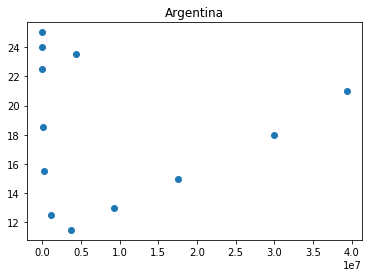

In [499]:
# 8. Plot a graph of the monthly number of confirmed cases vs. the average monthly temperature for Argentina
col1 = Argentina['Confirmed']
col2 = Argentina['avgTemp']
plt.scatter(col1, col2)
plt.title('Argentina')



In [500]:
# 8. analyze the correlation between these two factors
correlation = col1.corr(col2)
correlation

-0.03292314398943735

In [501]:
print('The correaltion -0.03 indicates that the monthly confirmed cases has negative correlation with monthly average temperature')

The correaltion -0.03 indicates that the monthly confirmed cases has negative correlation with monthly average temperature


In [502]:
Australia = cases_and_climate[cases_and_climate['Country/Region'] == 'Australia']

In [503]:
Australia

,Country/Region,Month,Confirmed,Recovered,Deaths,avgTemp
12,Australia,1,38,4.0,0,22.000
13,Australia,2,431,195.0,0,22.250
14,Australia,3,35679,2307.0,190,20.125
15,Australia,4,188206,91483.0,1817,17.000
16,Australia,5,217625,195488.0,3071,14.125
17,Australia,6,222611,205100.0,3075,11.625
18,Australia,7,361720,256329.0,3996,10.625
19,Australia,8,711091,474442.0,13006,11.750
20,Australia,9,800899,705803.0,24475,13.875
21,Australia,10,848364,777226.0,27949,16.500


Text(0.5, 1.0, 'Australia')

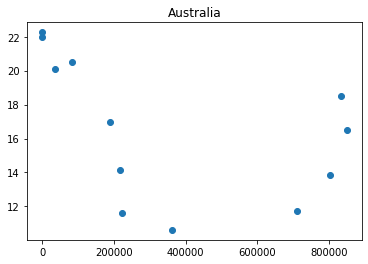

In [504]:
# 8. Plot a graph of the monthly number of confirmed cases vs. the average monthly temperature for Australia
x = Australia['Confirmed']
y = Australia['avgTemp']
plt.scatter(x, y)
plt.title('Australia')

In [505]:
# 8. analyze the correlation between these two factors
correlation = x.corr(y)
correlation

-0.466212837004417

In [506]:
print('-0.46 indicates that the monthly confirmed cases has negative correlation with monthly average temperature')

-0.46 indicates that the monthly confirmed cases has negative correlation with monthly average temperature


In [507]:
United_Kingdom = cases_and_climate[cases_and_climate['Country/Region'] == 'United Kingdom']
United_Kingdom

,Country/Region,Month,Confirmed,Recovered,Deaths,avgTemp
456,United Kingdom,1,2,0.0,0,7.0
457,United Kingdom,2,606,116.0,0,7.5
458,United Kingdom,3,283195,1925.0,12576,9.0
459,United Kingdom,4,3328344,14880.0,457216,11.0
460,United Kingdom,5,7016710,32790.0,1030749,14.0
461,United Kingdom,6,8213357,38818.0,1182674,17.0
462,United Kingdom,7,9120400,43441.0,1270661,19.0
463,United Kingdom,8,9933759,46765.0,1284798,19.0
464,United Kingdom,9,11564458,62246.0,1254505,16.5
465,United Kingdom,10,22002508,79854.0,1358294,13.0


Text(0.5, 1.0, 'United_Kingdom')

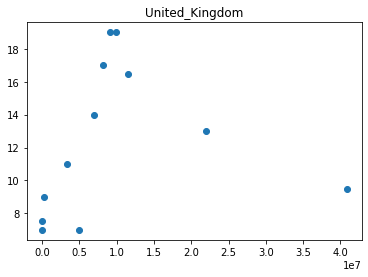

In [508]:
# 8. Plot a graph of the monthly number of confirmed cases vs. the average monthly temperature for United_Kingdom
x = United_Kingdom['Confirmed']
y = United_Kingdom['avgTemp']
plt.scatter(x, y)
plt.title('United_Kingdom')

In [509]:
# 8. analyze the correlation between these two factors
correlation = x.corr(y)
correlation

0.13260165214520306

In [510]:
print('0.13 indicates that the monthly confirmed cases has negligible correlation with monthly average temperature')

0.13 indicates that the monthly confirmed cases has negligible correlation with monthly average temperature


In [511]:
# 9. get the 10 countries with the highest recovery rate
merge = merge.groupby('Country/Region', as_index=False).sum()
merge['Recovery Rate'] = merge['Recovered'] / merge['Confirmed']
merge.sort_values('Recovery Rate', ascending=False).head(10)

,Country/Region,Confirmed,Recovered,Deaths,Month,Recovery Rate
171,Timor-Leste,6068,5584.0,0,2027,0.920237
67,Ghana,7173121,6557211.0,43842,2027,0.914136
12,Bahrain,10410972,9499440.0,37525,2027,0.912445
189,Zambia,1907504,1733272.0,42600,2027,0.908660
49,Djibouti,1040006,944996.0,10811,2027,0.908645
35,Chile,76171523,69158512.0,1955479,2027,0.907931
30,Cambodia,53313,48400.0,0,2027,0.907846
124,New Zealand,412230,374181.0,5281,2027,0.907700
170,Thailand,831496,754326.0,13876,2027,0.907191
139,Qatar,22550176,20451724.0,34540,2027,0.906943
